# [ATM 623: Climate Modeling](../index.ipynb)
[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany
# Lecture 17: Ice albedo feedback in the EBM

## Contents

1. [First section title](#section1)

____________
<a id='section1'></a>

## 1. First section title
____________

Some text.

### The annual mean EBM

the equation is

$$ C(\phi) \frac{\partial T_s}{\partial t} = (1-\alpha) ~ Q - \left( A + B~T_s \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$




### Temperature-dependent ice line

Let the surface albedo be larger wherever the temperature is below some threshold $T_f$:

$$ \alpha\left(\phi, T(\phi) \right) = \left\{\begin{array}{ccc} 
\alpha_0 + \alpha_2 P_2(\sin\phi) & ~ & T(\phi) > T_f \\
a_i & ~ & T(\phi) \le T_f \\
\end{array} \right. $$


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

In [21]:
#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'D':0.55}
model1 = climlab.EBM_annual( num_lat=180, **param )
print model1

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
top: <class 'climlab.model.ebm.EBM_annual'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>
   LW: <class 'climlab.radiation.AplusBT.AplusBT'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>



In [22]:
def ebm_plot( model, figsize=(8,12), show=True ):
    '''This function makes a plot of the current state of the model,
    including temperature, energy budget, and heat transport.'''
    templimits = -30,35
    radlimits = -340, 340
    htlimits = -7,7
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)
    
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(model.lat, model.Ts)
    ax1.set_xlim(latlimits)
    ax1.set_ylim(templimits)
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xticks( lat_ticks )
    ax1.grid()
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(model.lat, model.diagnostics['ASR'], 'k--', label='SW' )
    ax2.plot(model.lat, -model.diagnostics['OLR'], 'r--', label='LW' )
    ax2.plot(model.lat, model.diagnostics['net_radiation'], 'c-', label='net rad' )
    ax2.plot(model.lat, model.heat_transport_convergence(), 'g--', label='dyn' )
    ax2.plot(model.lat, model.diagnostics['net_radiation'].squeeze() 
             + model.heat_transport_convergence(), 'b-', label='total' )
    ax2.set_xlim(latlimits)
    ax2.set_ylim(radlimits)
    ax2.set_ylabel('Energy budget (W m$^{-2}$)')
    ax2.set_xticks( lat_ticks )
    ax2.grid()
    ax2.legend()
    
    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(model.lat_bounds, model.heat_transport() )
    ax3.set_xlim(latlimits)
    ax3.set_ylim(htlimits)
    ax3.set_ylabel('Heat transport (PW)')
    ax3.set_xlabel('Latitude')
    ax3.set_xticks( lat_ticks )
    ax3.grid()

    return fig

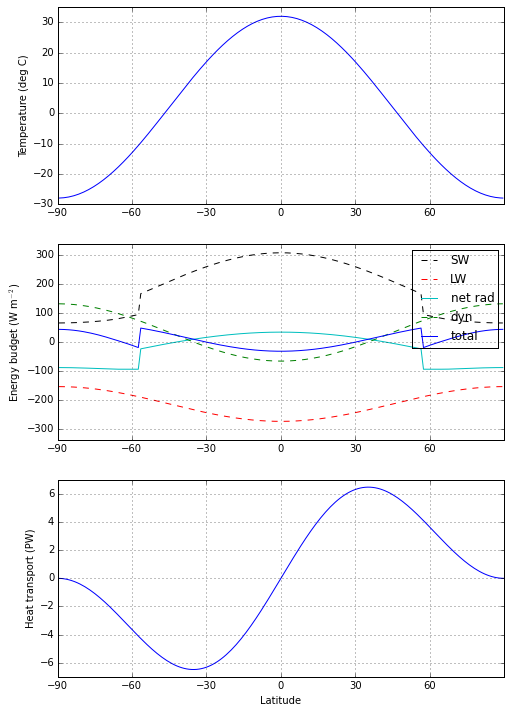

In [23]:
model1.compute_diagnostics()
f = ebm_plot(model1)

Integrating for 450 steps, 1826.211 days, or 5 years.
Total elapsed time is 5.03333333333 years.


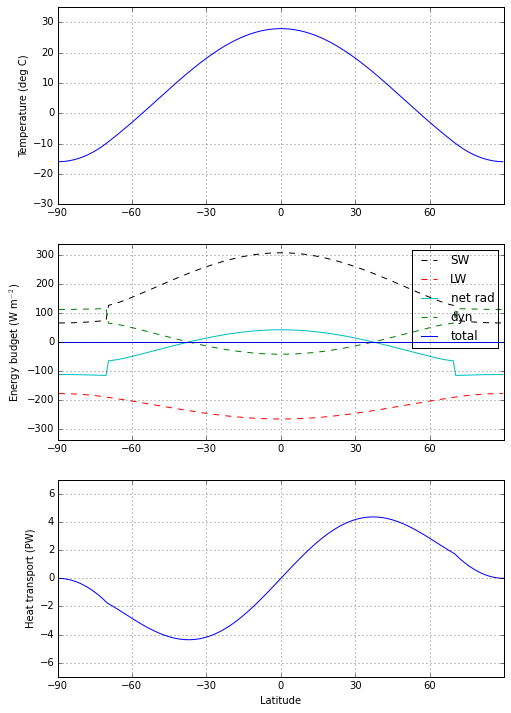

In [24]:
model1.integrate_years(5)
f = ebm_plot(model1)

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________

____________
## Version information
____________


In [1]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, climlab

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 2.7.9 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.1.0
OS Darwin 13.4.0 x86_64 i386 64bit
numpy 1.9.2
climlab 0.2.7
Mon Apr 20 12:10:39 2015 EDT